# **Homework 6**

Due Monday April 5 at 11:59pm
Submit an ipynb file to gradescope.
Remember to also submit Recitation 7. The homework has only 4 questions this week so that you can finish the entire recitation.

Load packages we will use.



In [1]:
#math
import numpy as np
import random

#dataframes
import pandas as pd

#ploting
import matplotlib.pyplot as plt

#regression tools
import statsmodels.api as sm
from patsy import dmatrices

# Problem 1: Linear Models

For each of the linear models below, answer the following questions: 
* Is the model linear in the parameters?
* If the model is not linear in the parameters, can it be transformed into a model that is linear? If yes, provide the transformed model. 

a. $Y = \beta_0 + \beta_1 X_1 + \beta_2 X_1^2 + \beta_3X_2$

Ans: Yes, this model is linear in the parameters

b. $Y = \beta_0 + \beta_1 X_1 + (\beta_2 X_1)^2 + \beta_3\beta_4X_2$

Ans: No, not linear in the parameters. This model can be re-written as: $Y = \beta_0 + \beta_1 X_1 + \beta_5 (X_1)^2 + \beta_3\beta_4X_2$ WHERE $\beta_5 = (\beta_2)^2$

c. $Y = \beta_0 + \beta_1 X_1\log(X_2)$

Ans: Yes, this model is linear in the parameters

d. $Y = \beta_0 + X_1\log(\beta_1X_2)$ 

Ans: No, not linear in the parameters. This model cannot be re-written.

## Problem 2: Generating Errors

Write Python code that produces an array called `epsilon` of length 10000 for which `plt.acorr(epsilon)`, the plot of correlation between values, produces a plot with a correlation above 0.25 at lags 0,1 and 2, and has a correlation below 0.05 for lags strictly larger than 2.  Hand in your code and your plot.

In [2]:
from numpy.random import rand, randn
data = randn(1002)
epsilon = data[:-2] + data[2:] + data[1:-1]

(array([-10,  -9,  -8,  -7,  -6,  -5,  -4,  -3,  -2,  -1,   0,   1,   2,
          3,   4,   5,   6,   7,   8,   9,  10]),
 array([ 0.03125118,  0.04496899,  0.02091225, -0.01258894, -0.09105203,
        -0.11243305, -0.09532501, -0.02104789,  0.34014662,  0.68753435,
         1.        ,  0.68753435,  0.34014662, -0.02104789, -0.09532501,
        -0.11243305, -0.09105203, -0.01258894,  0.02091225,  0.04496899,
         0.03125118]),
 <matplotlib.lines.Line2D at 0x173597899b0>)

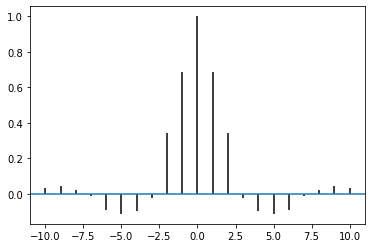

In [3]:
plt.acorr(epsilon)

## Problem 3: Assumptions for Linear Regression

There are five files available for download on github with this homework, HW6a.csv, HW6b.csv, HW6c.csv, HW6d.csv, and HW6e.csv. They each contain n = 100 rows of data. Each row, i = 1,...,100, contains two entries: Y_i, and X_i. 

For each of the 5 files, do the following:
* load the data from the file
* fit the linear model to the data
* plot Y vs X
* plot the residuals of the fitted model (epsilon) against X
* plot the absolute value of the residuals
* create a normal Q-Q plot o the residuals

For each of the four assumptions for linear regression, state whether each dataset abides or does not abide by each and why. The assumptions are that the residuals:
* have mutual independence
* are independent of the covariates
* are normally distributed
* have constant variance



In [4]:
#File 1 - HW6a.csv
hw6a = pd.read_csv('HW6a.csv')
Xa = hw6a["X"]
Ya = hw6a["Y"]
Xa = sm.add_constant(Xa)

C:\Users\bls24\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [5]:
model_hw6a = sm.OLS(Ya,Xa)
results_hw6a = model_hw6a.fit()
Xa = hw6a["X"]

Text(0.5, 0, 'X-value')

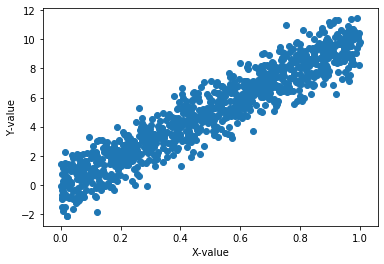

In [6]:
plt.scatter(Xa, Ya)
plt.ylabel("Y-value")
plt.xlabel("X-value")

Text(0.5, 0, 'X-value')

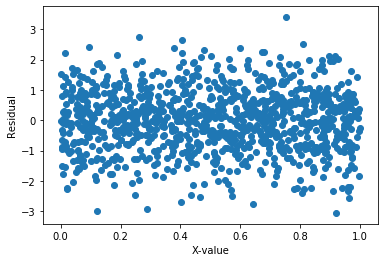

In [7]:
resid_hw6a = results_hw6a.resid
plt.scatter(Xa, resid_hw6a)
plt.ylabel("Residual")
plt.xlabel("X-value")

Text(0.5, 0, 'X-value')

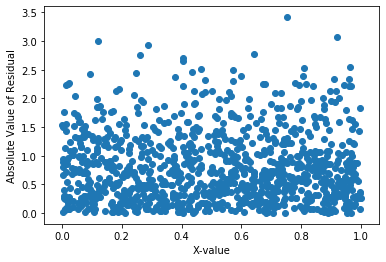

In [8]:
abs_resid_hw6a = np.abs(results_hw6a.resid)
plt.scatter(Xa, abs_resid_hw6a)
plt.ylabel("Absolute Value of Residual")
plt.xlabel("X-value")

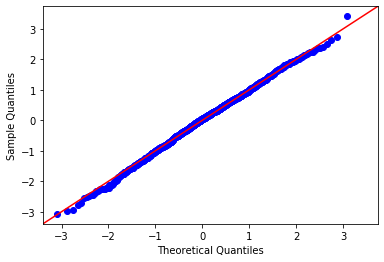

In [9]:
sm.qqplot(resid_hw6a, line='45');

(array([-10,  -9,  -8,  -7,  -6,  -5,  -4,  -3,  -2,  -1,   0,   1,   2,
          3,   4,   5,   6,   7,   8,   9,  10]),
 array([ 0.02041885, -0.01044618, -0.01797367,  0.01238223, -0.01085839,
        -0.00205111, -0.00266236,  0.04019684, -0.01140188,  0.00511775,
         1.        ,  0.00511775, -0.01140188,  0.04019684, -0.00266236,
        -0.00205111, -0.01085839,  0.01238223, -0.01797367, -0.01044618,
         0.02041885]),
 <matplotlib.lines.Line2D at 0x17359ec1438>)

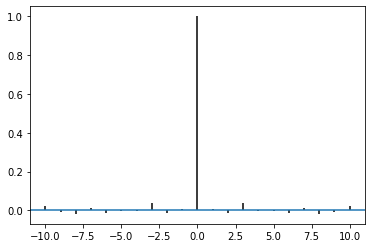

In [10]:
plt.acorr(resid_hw6a)

*plot autocorrelation -- mutual independence. Looking for spikes at lags other than zero, this would indicate mutual dependence*
* Since there are no spikes in lags other than lag=0, this regression confirms mutual independence

*independent in its co-variance -- no pattern*
* Since there is no pattern in the residual vs x-value plot, this regression is independent in its co-variance

*normally distributed -- straight line with qq plot*
* Since the qq plot results in a straight line of data points, the regression results are normally distributed

*we want constant variance not non-constant variance, no trend w abs plot*
* Since there is no pattern in the abs(residual) vs x-value plot, this regression confirms constant variance

In [11]:
hw6b = pd.read_csv("HW6b.csv")
Xb = hw6b["X"]
Yb = hw6b["Y"]
Xb = sm.add_constant(Xb)

In [12]:
model_hw6b = sm.OLS(Yb, Xb)
results_hw6b = model_hw6b.fit()
Xb = hw6b["X"]

Text(0.5, 0, 'X-value')

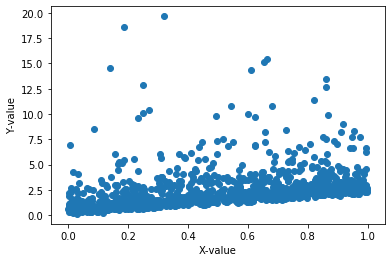

In [13]:
plt.scatter(Xb, Yb)
plt.ylabel("Y-value")
plt.xlabel("X-value")

Text(0.5, 0, 'X-value')

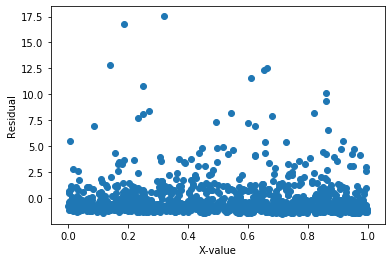

In [14]:
resid_hw6b = results_hw6b.resid
plt.scatter(Xb, resid_hw6b)
plt.ylabel("Residual")
plt.xlabel("X-value")

Text(0.5, 0, 'X-value')

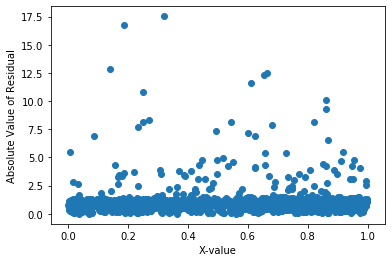

In [15]:
abs_resid_hw6b = np.abs(results_hw6b.resid)
plt.scatter(Xb, abs_resid_hw6b)
plt.ylabel("Absolute Value of Residual")
plt.xlabel("X-value")

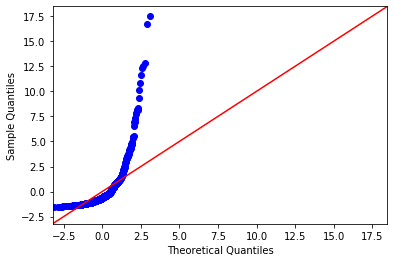

In [16]:
sm.qqplot(resid_hw6b, line="45");

(array([-10,  -9,  -8,  -7,  -6,  -5,  -4,  -3,  -2,  -1,   0,   1,   2,
          3,   4,   5,   6,   7,   8,   9,  10]),
 array([-0.02217538, -0.03951465,  0.04769829,  0.02619111, -0.04865764,
         0.019504  , -0.00156615, -0.0512917 , -0.00985994,  0.01645377,
         1.        ,  0.01645377, -0.00985994, -0.0512917 , -0.00156615,
         0.019504  , -0.04865764,  0.02619111,  0.04769829, -0.03951465,
        -0.02217538]),
 <matplotlib.lines.Line2D at 0x1735a064be0>)

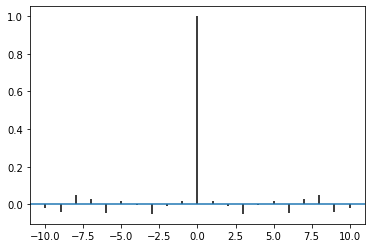

In [17]:
plt.acorr(resid_hw6b)

*plot autocorrelation -- mutual independence. Looking for spikes at lags other than zero, this would indicate mutual dependence*
* Since there are no significant spikes in lags other than lag=0, this regression is mutually independent

*independent in its co-variance -- no pattern*
* Since there is no pattern in the residual vs x-value plot, this regression is independent in its co-variance

*normally distributed -- straight line with qq plot*
* Since the qq plot does not result in a straight line of data points, the regression results are NOT normally distributed and the regression does not abide by the normal distribution assumption

*we want constant variance not non-constant variance, no trend w abs plot*
* Since there is no pattern in the abs(residual) vs x-value plot, this regression confirms constant variance

In [18]:
hw6c = pd.read_csv("HW6c.csv")
Xc = hw6c["X"]
Yc = hw6c["Y"]
Xc = sm.add_constant(Xc)

In [19]:
model_hw6c = sm.OLS(Yc, Xc)
results_hw6c = model_hw6c.fit()
Xc = hw6c["X"]

Text(0.5, 0, 'X-value')

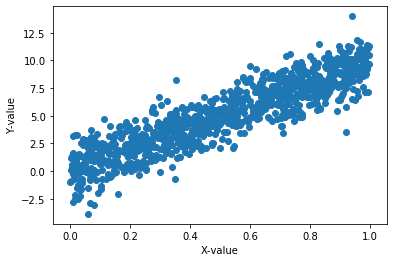

In [20]:
plt.scatter(Xc, Yc)
plt.ylabel("Y-value")
plt.xlabel("X-value")

Text(0.5, 0, 'X-value')

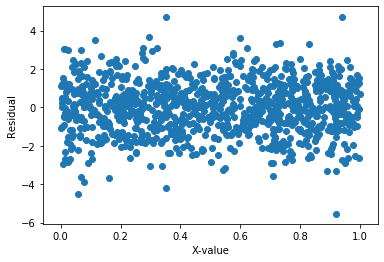

In [21]:
resid_hw6c = results_hw6c.resid
plt.scatter(Xc, resid_hw6c)
plt.ylabel("Residual")
plt.xlabel("X-value")

Text(0.5, 0, 'X-value')

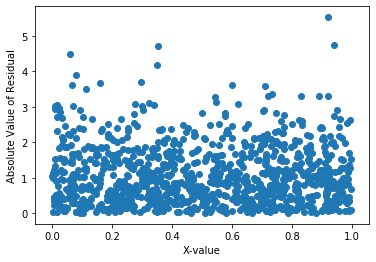

In [22]:
abs_resid_hw6c = np.abs(results_hw6c.resid)
plt.scatter(Xc, abs_resid_hw6c)
plt.ylabel("Absolute Value of Residual")
plt.xlabel("X-value")

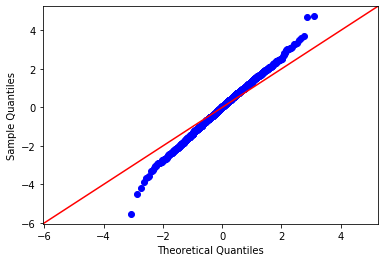

In [23]:
sm.qqplot(resid_hw6c, line="45");

(array([-10,  -9,  -8,  -7,  -6,  -5,  -4,  -3,  -2,  -1,   0,   1,   2,
          3,   4,   5,   6,   7,   8,   9,  10]),
 array([-0.00590329, -0.0255667 ,  0.03012892,  0.05890184,  0.04095942,
         0.03619311,  0.05243378,  0.04355573,  0.02145524,  0.50413284,
         1.        ,  0.50413284,  0.02145524,  0.04355573,  0.05243378,
         0.03619311,  0.04095942,  0.05890184,  0.03012892, -0.0255667 ,
        -0.00590329]),
 <matplotlib.lines.Line2D at 0x1735a258b70>)

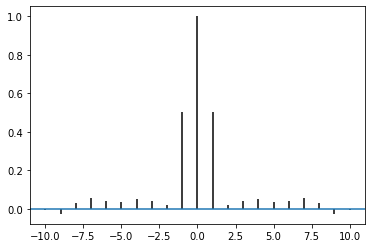

In [24]:
plt.acorr(resid_hw6c)

*plot autocorrelation -- mutual independence. Looking for spikes at lags other than zero, this would indicate mutual dependence*
* Since there are two other significant spikes in lags other than lag=0 (around lag=1), this regression is mutually dependent and does not abide by this assumption

*independent in its co-variance -- no pattern*
* Since there is no pattern in the residual vs x-value plot, this regression is independent in its co-variance

*normally distributed -- straight line with qq plot*
* Since the qq plot results in a straight line of data points, the regression results are normally distributed

*we want constant variance not non-constant variance, no trend w abs plot*
* Since there is no pattern in the abs(residual) vs x-value plot, this regression confirms constant variance

In [25]:
hw6d = pd.read_csv("HW6d.csv")
Xd = hw6d["X"]
Yd = hw6d["Y"]
Xd = sm.add_constant(Xd)

In [26]:
model_hw6d = sm.OLS(Yd, Xd)
results_hw6d = model_hw6d.fit()
Xd = hw6d["X"]

Text(0.5, 0, 'X-value')

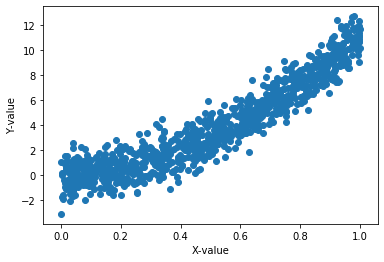

In [27]:
plt.scatter(Xd, Yd)
plt.ylabel("Y-value")
plt.xlabel("X-value")

Text(0.5, 0, 'X-value')

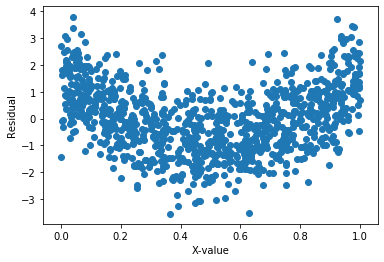

In [28]:
resid_hw6d = results_hw6d.resid
plt.scatter(Xd, resid_hw6d)
plt.ylabel("Residual")
plt.xlabel("X-value")

Text(0.5, 0, 'X-value')

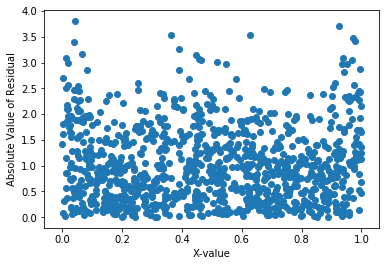

In [29]:
abs_resid_hw6d = np.abs(results_hw6d.resid)
plt.scatter(Xd, abs_resid_hw6d)
plt.ylabel("Absolute Value of Residual")
plt.xlabel("X-value")

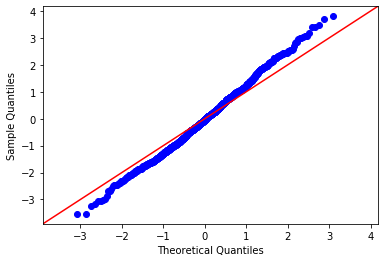

In [30]:
sm.qqplot(resid_hw6d, line="45");

(array([-10,  -9,  -8,  -7,  -6,  -5,  -4,  -3,  -2,  -1,   0,   1,   2,
          3,   4,   5,   6,   7,   8,   9,  10]),
 array([ 3.70734201e-02,  2.13809233e-02, -4.71919078e-04,  2.10375297e-02,
        -1.30805537e-02, -2.36209679e-02, -1.68514283e-02, -3.70681574e-03,
        -4.47783448e-02,  2.01229405e-02,  1.00000000e+00,  2.01229405e-02,
        -4.47783448e-02, -3.70681574e-03, -1.68514283e-02, -2.36209679e-02,
        -1.30805537e-02,  2.10375297e-02, -4.71919078e-04,  2.13809233e-02,
         3.70734201e-02]),
 <matplotlib.lines.Line2D at 0x1735b3dff28>)

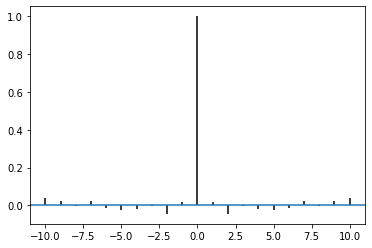

In [31]:
plt.acorr(resid_hw6d)

*plot autocorrelation -- mutual independence. Looking for spikes at lags other than zero, this would indicate mutual dependence*
* Since there are no significant spikes in lags other than lag=0, this regression is mutually independent

*independent in its co-variance -- no pattern*
* Since there is a pattern in the residual vs x-value plot, this regression is not independent in its co-variance -- it violates this assumption

*normally distributed -- straight line with qq plot*
* The qq plot does not result in a straight line of data points. Thus, the regression results are NOT normally distributed and the regression does not abide by the normal distribution assumption

*we want constant variance not non-constant variance, no trend w abs plot*
* Since there is no pattern in the abs(residual) vs x-value plot, this regression confirms constant variance

In [32]:
hw6e = pd.read_csv("HW6e.csv")
Xe = hw6e["X"]
Ye = hw6e["Y"]
Xe = sm.add_constant(Xe)

In [33]:
model_hw6e = sm.OLS(Ye, Xe)
results_hw6e = model_hw6e.fit()
Xe = hw6e["X"]

Text(0.5, 0, 'X-value')

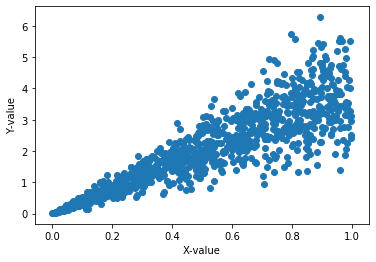

In [34]:
plt.scatter(Xe, Ye)
plt.ylabel("Y-value")
plt.xlabel("X-value")

Text(0.5, 0, 'X-value')

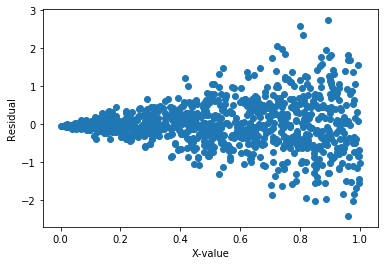

In [35]:
resid_hw6e = results_hw6e.resid
plt.scatter(Xe, resid_hw6e)
plt.ylabel("Residual")
plt.xlabel("X-value")

Text(0.5, 0, 'X-value')

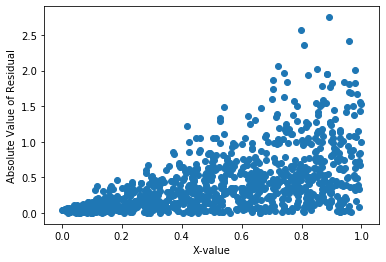

In [36]:
abs_resid_hw6e = np.abs(results_hw6e.resid)
plt.scatter(Xe, abs_resid_hw6e)
plt.ylabel("Absolute Value of Residual")
plt.xlabel("X-value")

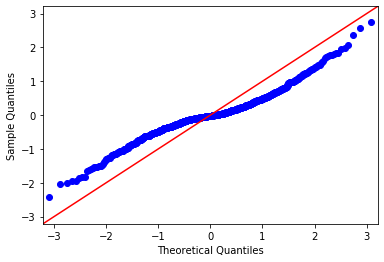

In [37]:
sm.qqplot(resid_hw6e, line="45");

(array([-10,  -9,  -8,  -7,  -6,  -5,  -4,  -3,  -2,  -1,   0,   1,   2,
          3,   4,   5,   6,   7,   8,   9,  10]),
 array([-0.00702657, -0.0164372 , -0.01605857, -0.0371224 ,  0.05999423,
         0.00848825, -0.01599591,  0.00949645,  0.00378275,  0.03936865,
         1.        ,  0.03936865,  0.00378275,  0.00949645, -0.01599591,
         0.00848825,  0.05999423, -0.0371224 , -0.01605857, -0.0164372 ,
        -0.00702657]),
 <matplotlib.lines.Line2D at 0x1735b4e7e48>)

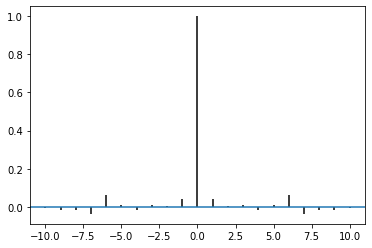

In [38]:
plt.acorr(resid_hw6e)

*plot autocorrelation -- mutual independence. Looking for spikes at lags other than zero, this would indicate mutual dependence*
* Since there are no significant spikes in lags other than lag=0, this regression is mutually independent

*independent in its co-variance -- no pattern*
* Since there is a pattern, but  the average residual is 0 in the residual vs x-value plot, this regression is independent in its co-variance

*normally distributed -- straight line with qq plot*
* The qq plot does not result in a straight line of data points. Thus, the regression results are NOT normally distributed and the regression does not abide by the normal distribution assumption

*we want constant variance not non-constant variance, no trend w abs plot*
* Since there the abs(residual) vs x-value plot displays values centered around zero, this regression confirms constant variance

## Problem 4: SAT vs GPA

In this problem, we will try to understand how GPA and SAT scores are related. Start by importing the data set called 'SATvsGPA.csv', available on github. 

In [39]:
## Code here
df = pd.read_csv('SATvsGPA.csv')
df.head()

,SAT,GPA
0,1714,2.40
1,1664,2.52
2,1760,2.54
3,1685,2.74
4,1693,2.83


a. Plot scatterplot with the SAT scores as the x-axis and the GPAs as the y-axis. 

Text(0.5, 1.0, 'SAT Scores vs GPAs')

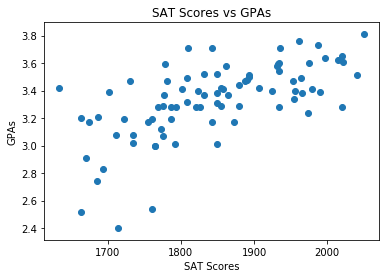

In [44]:
## Code here
X = df['SAT']
Y = df['GPA']
scatter = plt.scatter(X,Y)
plt.xlabel('SAT Scores')
plt.ylabel('GPAs')
plt.title('SAT Scores vs GPAs')

b. Fit a linear model to the data, and plot it on top of the scatterplot.

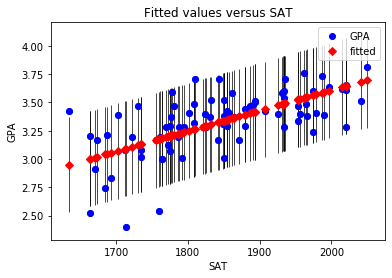

In [52]:
## Code here -- I chose not to add a constant because doing so messed up this regression
model = sm.OLS(Y,X).fit()
sm.graphics.plot_fit(model,0)
plt.scatter(X, Y)
plt.show()

c. Print out the model summary. What conclusions would you make about how GPA and SAT scores are related based on this model? Use the statistics in the model summary to justify these conclusions. 

In [42]:
#Code Here
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                    GPA   R-squared (uncentered):                   0.996
Model:                            OLS   Adj. R-squared (uncentered):              0.996
Method:                 Least Squares   F-statistic:                          2.120e+04
Date:                Mon, 05 Apr 2021   Prob (F-statistic):                   9.38e-102
Time:                        20:08:41   Log-Likelihood:                          12.440
No. Observations:                  84   AIC:                                     -22.88
Df Residuals:                      83   BIC:                                     -20.45
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
SAT            0.0018   1.24e-05    145.594      0.000       0.002       0.002
==============================================================================
Omnibus:                        9.848   Durbin-Watson:                   1.116
Prob(Omnibus):                  0.007   Jarque-Bera (JB):               11.422
Skew:                          -0.594   Prob(JB):                      0.00331
Kurtosis:                       4.361   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Ans: 
* p-value < .05, statistically relevant data. 
* The SAT variable has a coefficient of 0.0018, meaning that a 1 point increase of SAT score correlates with a 0.0018 increase in on GPA
* R-squared value of .996 indicates that this model explains nearly all the variability in this data